ابتدا ابزار مورد نیاز را ایمپورت میکنیم

In [77]:
import numpy
import cv2
import matplotlib.pyplot as plt

سپس تابعی برای ساختن مربع هایی با دایره سفید در مرکز ایجاد میکنیم

In [78]:
def circleMask(D:int , size:int):
    center = size / 2;
    
    mask = numpy.array([[ (1 if ((x - center)**2 + (y - center)**2 < (D / 2)**2) else 0) for x in range(size) ] for y in range(size)])
    
    return mask

در این مرحله تابعی برای ساختن کرنل با هسته گوسی ایجاد میکنیم

In [79]:
def guassianKernel(size:int , sigma:int):
    xdir_gauss = cv2.getGaussianKernel(size, sigma)
    kernel = numpy.multiply(xdir_gauss.T, xdir_gauss)
    
    return kernel

در ادامه تابعی برای محاسبه psnr مینویسیم

In [80]:
def calculatePSNR(FirstImage , SecondImage):
    imageSize = FirstImage.shape
    MSEArray = (FirstImage - SecondImage) ** 2

    MSE = MSEArray.sum() / (imageSize[0] * imageSize[1])

    if(MSE == 0):
        return "infinity"
    
    PSNR = 10 * numpy.log((255 ** 2) / MSE)

    return str(PSNR)

حال تصاویر مورد نظر را میخوانیم و تبدیل آن را حساب میکنیم

In [81]:
lena = cv2.imread("../lena512.bmp",cv2.IMREAD_GRAYSCALE)
lena_freq = numpy.fft.fft2(lena)
lenaShape = lena.shape[0];

سپس ماسک های دایره ای که قرار است به ترتیب روی تصویر اعمال شوند را حساب میکنیم از مرحله اول که یک دهم تصویر است تا مرحله اخر و آن ها را شیفت میدهیم

Text(0.5, 1.0, 'fifth level')

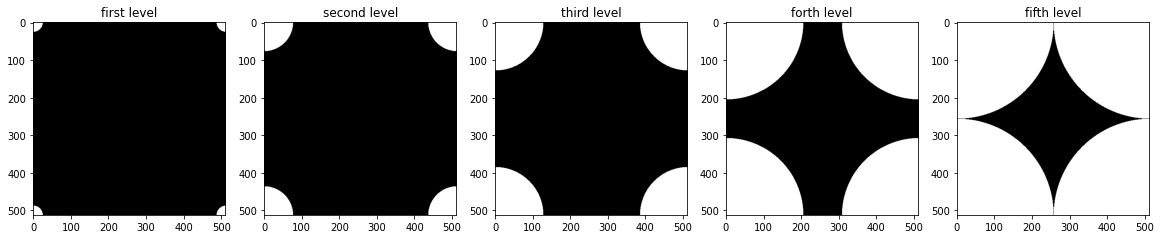

In [82]:
firstLevel_circle_1from10 = numpy.fft.fftshift( circleMask(lenaShape / 10 , lenaShape))
secondLevel_circle_3from10 = numpy.fft.fftshift(circleMask(3 * (lenaShape / 10) , lenaShape))
thirdLevel_circle_5from10 = numpy.fft.fftshift(circleMask(5 * (lenaShape / 10) , lenaShape))
forthLevel_circle_8from10 = numpy.fft.fftshift(circleMask(8 * (lenaShape / 10) , lenaShape))
fifthLevel_circle_10from10 = numpy.fft.fftshift(circleMask(lenaShape , lenaShape))

fig2 , subplot = plt.subplots(1 , 5 , figsize=(20, 20))
subplot[0].imshow(firstLevel_circle_1from10 , cmap = "gray")
subplot[0].set_title("first level")

subplot[1].imshow(secondLevel_circle_3from10 , cmap = "gray")
subplot[1].set_title("second level")

subplot[2].imshow(thirdLevel_circle_5from10 , cmap = "gray")
subplot[2].set_title("third level")

subplot[3].imshow(forthLevel_circle_8from10 , cmap = "gray")
subplot[3].set_title("forth level")

subplot[4].imshow(fifthLevel_circle_10from10 , cmap = "gray")
subplot[4].set_title("fifth level")

در این مرحله ماسک هایی که قرار است به تصویر اعمال شود را نشان میدهیم.

Text(0.5, 1.0, 'fifth level')

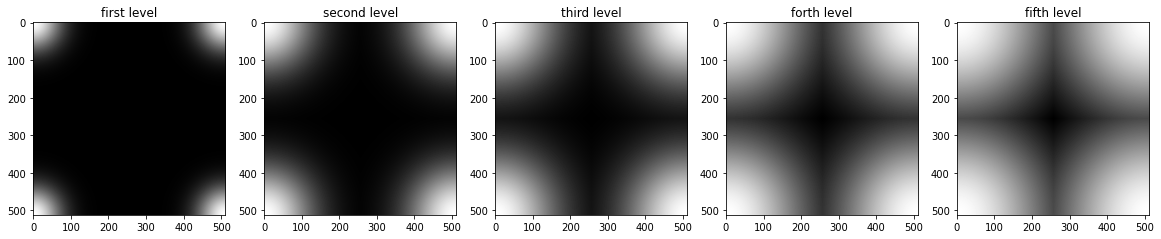

In [83]:
sigma_step = 51.2
firstLevel_guass_1from10 = numpy.fft.fftshift(guassianKernel(lenaShape , 1 * sigma_step))
secondLevel_guass_3from10 = numpy.fft.fftshift(guassianKernel(lenaShape , 1.75 * sigma_step))
thirdLevel_guass_5from10 = numpy.fft.fftshift(guassianKernel(lenaShape , 2.25 * sigma_step))
forthLevel_guass_8from10 = numpy.fft.fftshift(guassianKernel(lenaShape , 3 * sigma_step))
fifthLevel_guass_10from10 = numpy.fft.fftshift(guassianKernel(lenaShape , 3.75 * sigma_step))

fig2 , subplot = plt.subplots(1 , 5 , figsize=(20, 20))
subplot[0].imshow(firstLevel_guass_1from10 , cmap = "gray")
subplot[0].set_title("first level")

subplot[1].imshow(secondLevel_guass_3from10 , cmap = "gray")
subplot[1].set_title("second level")

subplot[2].imshow(thirdLevel_guass_5from10 , cmap = "gray")
subplot[2].set_title("third level")

subplot[3].imshow(forthLevel_guass_8from10 , cmap = "gray")
subplot[3].set_title("forth level")

subplot[4].imshow(fifthLevel_guass_10from10 , cmap = "gray")
subplot[4].set_title("fifth level")

حال ماسک های دایره ای را بر روی تصویر در حوزه فرکانس اعمال میکنیم و سپس بازسازی میکنیم و پس از آن psnr را حساب میکنیم

Text(0.5, 1.0, 'psnr: 106.02977469118665')

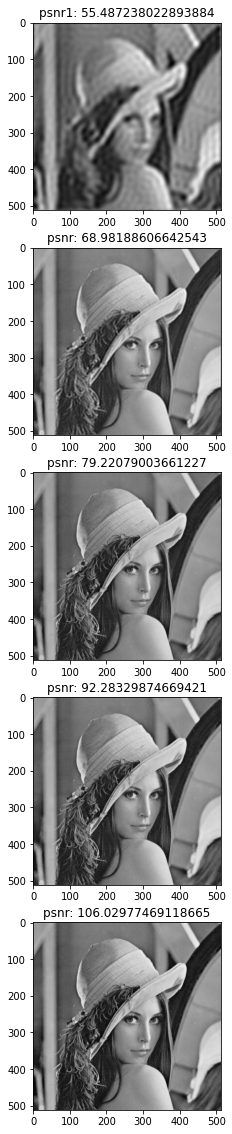

In [84]:
masked_firstLevel_circle_1from10_freq = lena_freq * firstLevel_circle_1from10
masked_secondLevel_circle_3from10_freq = lena_freq * secondLevel_circle_3from10
masked_thirdLevel_circle_5from10_freq = lena_freq * thirdLevel_circle_5from10
masked_forthLevel_circle_8from10_freq = lena_freq * forthLevel_circle_8from10
masked_fifthLevel_circle_10from10_freq = lena_freq * fifthLevel_circle_10from10

masked_firstLevel_circle_1from10 = numpy.fft.ifft2(masked_firstLevel_circle_1from10_freq)
masked_secondLevel_circle_3from10 = numpy.fft.ifft2(masked_secondLevel_circle_3from10_freq)
masked_thirdLevel_circle_5from10 = numpy.fft.ifft2(masked_thirdLevel_circle_5from10_freq)
masked_forthLevel_circle_8from10 = numpy.fft.ifft2(masked_forthLevel_circle_8from10_freq)
masked_fifthLevel_circle_10from10 = numpy.fft.ifft2(masked_fifthLevel_circle_10from10_freq)

fig2 , subplot2 = plt.subplots(5 , 1 , figsize=(20, 20))
subplot2[0].imshow(numpy.abs(masked_firstLevel_circle_1from10).astype(float) , cmap = "gray")
subplot2[0].set_title("psnr1: "+ calculatePSNR(lena , masked_firstLevel_circle_1from10.real))

subplot2[1].imshow(numpy.abs(masked_secondLevel_circle_3from10).astype(float) , cmap = "gray")
subplot2[1].set_title("psnr: "+ calculatePSNR(lena , masked_secondLevel_circle_3from10.real))

subplot2[2].imshow(numpy.abs(masked_thirdLevel_circle_5from10).astype(float) , cmap = "gray")
subplot2[2].set_title("psnr: "+ calculatePSNR(lena , masked_thirdLevel_circle_5from10.real))

subplot2[3].imshow(numpy.abs(masked_forthLevel_circle_8from10).astype(float) , cmap = "gray")
subplot2[3].set_title("psnr: " + calculatePSNR(lena , masked_forthLevel_circle_8from10.real))

subplot2[4].imshow(numpy.abs(masked_fifthLevel_circle_10from10).astype(float) , cmap = "gray")
subplot2[4].set_title("psnr: "+ calculatePSNR(lena , masked_fifthLevel_circle_10from10.real))

همان اعمال را با استفاده از ماسک های گوسی انجام میدهیم.

Text(0.5, 1.0, 'psnr: 13.024359070036024')

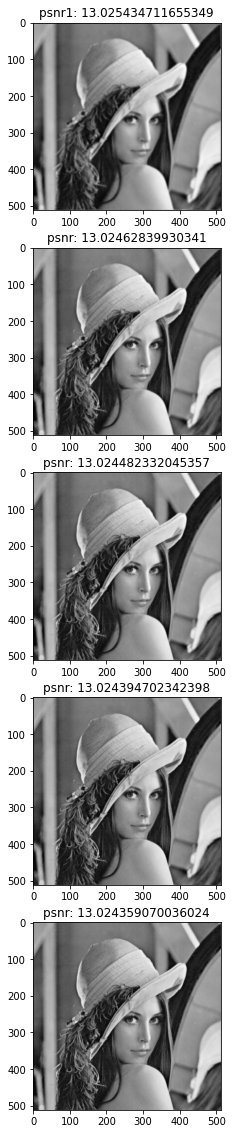

In [86]:
masked_firstLevel_guass_1from10_freq = lena_freq * firstLevel_guass_1from10
masked_secondLevel_guass_3from10_freq = lena_freq * secondLevel_guass_3from10
masked_thirdLevel_guass_5from10_freq = lena_freq * thirdLevel_guass_5from10
masked_forthLevel_guass_8from10_freq = lena_freq * forthLevel_guass_8from10
masked_fifthLevel_guass_10from10_freq = lena_freq * fifthLevel_guass_10from10

masked_firstLevel_guass_1from10 = numpy.fft.ifft2(masked_firstLevel_guass_1from10_freq)
masked_secondLevel_guass_3from10 = numpy.fft.ifft2(masked_secondLevel_guass_3from10_freq)
masked_thirdLevel_guass_5from10 = numpy.fft.ifft2(masked_thirdLevel_guass_5from10_freq)
masked_forthLevel_guass_8from10 = numpy.fft.ifft2(masked_forthLevel_guass_8from10_freq)
masked_fifthLevel_guass_10from10 = numpy.fft.ifft2(masked_fifthLevel_guass_10from10_freq)

fig2 , subplot2 = plt.subplots(5 , 1 , figsize=(20, 20))
subplot2[0].imshow(numpy.abs(masked_firstLevel_guass_1from10).astype(float) , cmap = "gray")
subplot2[0].set_title("psnr1: "+ calculatePSNR(lena , masked_firstLevel_guass_1from10.real))

subplot2[1].imshow(numpy.abs(masked_secondLevel_guass_3from10).astype(float) , cmap = "gray")
subplot2[1].set_title("psnr: "+ calculatePSNR(lena , masked_secondLevel_guass_3from10.real))

subplot2[2].imshow(numpy.abs(masked_thirdLevel_guass_5from10).astype(float) , cmap = "gray")
subplot2[2].set_title("psnr: "+ calculatePSNR(lena , masked_thirdLevel_guass_5from10.real))

subplot2[3].imshow(numpy.abs(masked_forthLevel_guass_8from10).astype(float) , cmap = "gray")
subplot2[3].set_title("psnr: " + calculatePSNR(lena , masked_forthLevel_guass_8from10.real))

subplot2[4].imshow(numpy.abs(masked_fifthLevel_guass_10from10).astype(float) , cmap = "gray")
subplot2[4].set_title("psnr: "+ calculatePSNR(lena , masked_fifthLevel_guass_10from10.real))

همانطور که میبینیم این ماسک ها بخشی از فرکانس های تصویر را فیلتر میکنند و بسته به اندازه آن ها خروجی میتواند گسترده یا محدود باشد. هرچه اندازه شعاع دایره در مرکز ماسک کم تر باشد ساختر کلی تری از تصویر در خروجی خواهیم داشت. از این رویکرد میتوان در کاهش حجم استفاده کرد به این صورت که با گذر ندادن فرکانس های بالا ساختار کلی تصویر را با حجم کمتر ارسال کرد. 
مزیت ماسک ها با مرکز گوسی نسبت به ماسک هایی که مرکز دایره ای داشتند این است که در نوع دوم یعنی ماسک های دایره ای یک جور بلوک بندی هایی در تصویر مشاهده میشود که در ماسک ها با مرکز گوسی چنین پدیده ای وجود ندارد.